In [2]:
import numpy as np
import pandas as pd

# Z-Test for the Difference in Two Proportions: Heart Disease
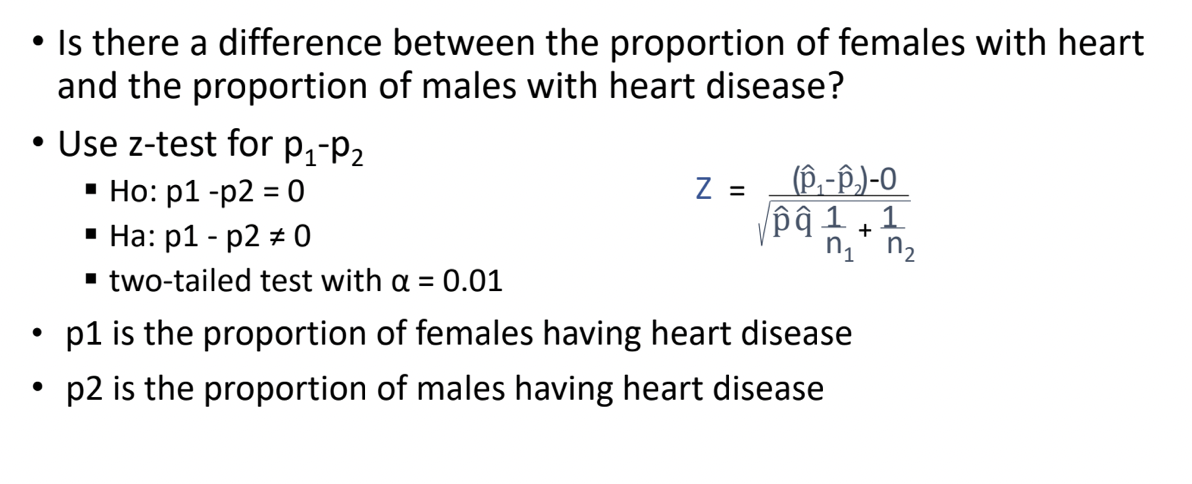

In [4]:
df = pd.read_csv('./HeartDisease.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,target
0,63,1,3,145,233,1,0,1
1,37,1,2,130,250,0,1,1
2,41,0,1,130,204,0,0,1
3,56,1,1,120,236,0,1,1
4,57,0,0,120,354,0,1,1


In [5]:
df['Gender'] = df.sex.replace({1: 'Male', 0: 'Female'})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,target,Gender
0,63,1,3,145,233,1,0,1,Male
1,37,1,2,130,250,0,1,1,Male
2,41,0,1,130,204,0,0,1,Female
3,56,1,1,120,236,0,1,1,Male
4,57,0,0,120,354,0,1,1,Female


In [11]:
df.groupby('Gender')

In [13]:
df.groupby('Gender')['target']

In [16]:
df.groupby('Gender')['target'] \
    .agg([lambda x: np.sum(x==1)], 'size')

,<lambda>
Gender,
Female,72
Male,93


In [9]:
p = df.groupby('Gender')['target'] \
    .agg([lambda z: np.sum(z==1),'size'])
p.columns = ['HeartDisease', 'Total']
p

,HeartDisease,Total
Gender,,
Female,72,96
Male,93,207


In [17]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

significance = 0.01
successes = np.array([ p.HeartDisease.Female, p.HeartDisease.Male])
samples = np.array([p.Total.Female, p.Total.Male])

In [18]:
successes

array([72, 93])

In [19]:
samples

array([ 96, 207])

In [23]:
stat, p_value = proportions_ztest(count=successes,
                                  nobs=samples,
                                  alternative='two-sided')

In [24]:
print('z_stat: %0.5f, p_value: %0.6f' % (stat, p_value))
if p_value < significance:
    print ("Reject the null hypothesis")
else:
    print ("Accept the null hypothesis")
    
# สัดส่วนการเป็นโรคหัวใจของผู้หญิงกับผู้ชายนั้นต่างกัน

z_stat: 4.89023, p_value: 0.000001
Reject the null hypothesis


# Chi-square Test
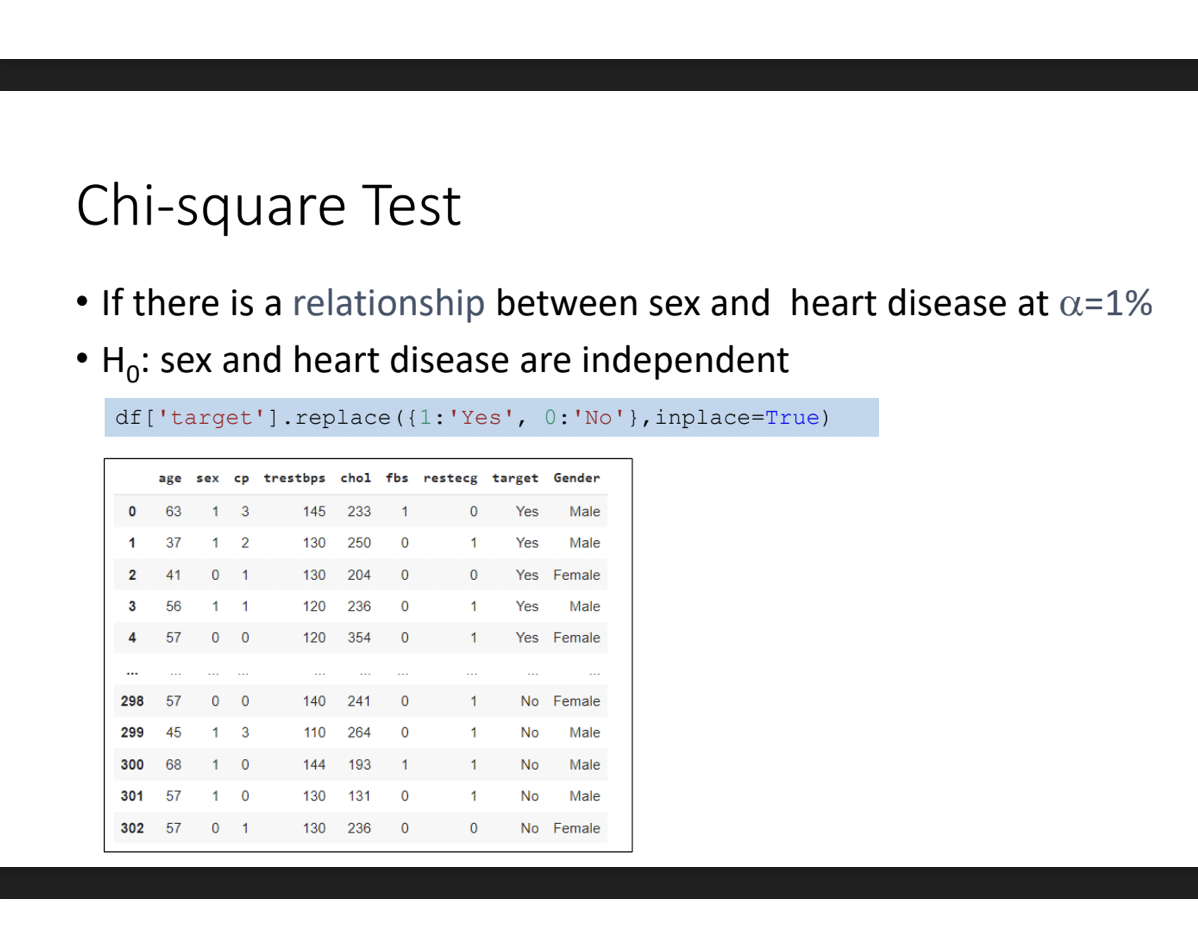

In [25]:
df['target'].replace({1:'Yes', 0:'No'},inplace=True)

In [26]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,target,Gender
0,63,1,3,145,233,1,0,Yes,Male
1,37,1,2,130,250,0,1,Yes,Male
2,41,0,1,130,204,0,0,Yes,Female
3,56,1,1,120,236,0,1,Yes,Male
4,57,0,0,120,354,0,1,Yes,Female
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,No,Female
299,45,1,3,110,264,0,1,No,Male
300,68,1,0,144,193,1,1,No,Male
301,57,1,0,130,131,0,1,No,Male


In [32]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [29]:
# Contigency table
Table1 = pd.crosstab(df.Gender, df.target, margins=True)
Table1

target,No,Yes,All
Gender,,,
Female,24,72,96
Male,114,93,207
All,138,165,303


In [35]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(Table1,correction=False)
print(f"chi2 statistic: {chi2:.5g}")
print(f"p-value: {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)


chi2 statistic: 23.914
p-value: 8.3094e-05
degrees of freedom: 4
expected frequencies:
[[ 43.72277228  52.27722772  96.        ]
 [ 94.27722772 112.72277228 207.        ]
 [138.         165.         303.        ]]


In [34]:

significance = 0.01
if p < significance:
    print ("sex and have heart disease are dependent")
else:
    print ("sex and have heart disease are independent")

sex and have heart disease are dependent
